# Scikit - Ejercicios Regresión
- - -

*Para realizar los ejercicios emplea la cantidad de celdas que te sean necesarias*

- - -
1 - Carga el dataset desde la url indicada y evita que Pandas asuma que la primera línea corresponda al nombre de las columnas:

https://raw.githubusercontent.com/4data-lab/datasets/master/breast-cancer-wisconsin.csv

In [76]:
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

# URL del conjunto de datos
url = "https://raw.githubusercontent.com/4data-lab/datasets/master/breast-cancer-wisconsin.csv"


# Cargar el conjunto de datos de la url, sin asignar header como la primera línea de datos
df = pd.read_csv(url, header=None)

2 - Muestra las primeras cinco filas del dataset y también muestra las últimas cinco filas del dataset

In [77]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,benigno
1,1002945,5,4,4,5,7,10,3,2,1,benigno
2,1015425,3,1,1,1,2,2,3,1,1,benigno
3,1016277,6,8,8,1,3,4,3,7,1,benigno
4,1017023,4,1,1,3,2,1,3,1,1,benigno


In [78]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10
694,776715,3,1,1,1,3,2,1,1,1,benigno
695,841769,2,1,1,1,2,1,1,1,1,benigno
696,888820,5,10,10,3,7,3,8,10,2,maligno
697,897471,4,8,6,4,3,4,10,6,1,maligno
698,897471,4,8,8,5,4,5,10,4,1,maligno


- - -
3 - Obten el número de filas y columnas de las que consta el dataframe

In [79]:
df.shape

(699, 11)

- - -
4 - Renombra las columnas del dataset

    01. Sample_code_number
    02. Clump_Thickness
    03. Uniformity_of_Cell_Size
    04. Uniformity_of_Cell_Shape
    05. Marginal_Adhesion
    06. Single_Epithelial_Cell_Size
    07. Bare_Nuclei
    08. Bland_Chromatin
    09. Normal_Nucleoli
    10. Mitoses
    11. Class

Nota : "Class contiene dos posibles valores: benigno, maligno"

In [80]:
column_names = [
    "Sample_code_number",
    "Clump_Thickness",
    "Uniformity_of_Cell_Size",
    "Uniformity_of_Cell_Shape",
    "Marginal_Adhesion",
    "Single_Epithelial_Cell_Size",
    "Bare_Nuclei",
    "Bland_Chromatin",
    "Normal_Nucleoli",
    "Mitoses",
    "Class" ]

# Cargar el conjunto de datos de la url, sin asignar header como la primera línea de datos, y asignando nombres en las columnas
df = pd.read_csv(url, header=None, names=column_names)

- - -
5 - Empleado Matplotlib y Seaborn realiza una count plot de la columna objetivo ("Class") y pon como título "Count Plot of target class"

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Class"].value_counts()

benigno    458
maligno    241
Name: Class, dtype: int64

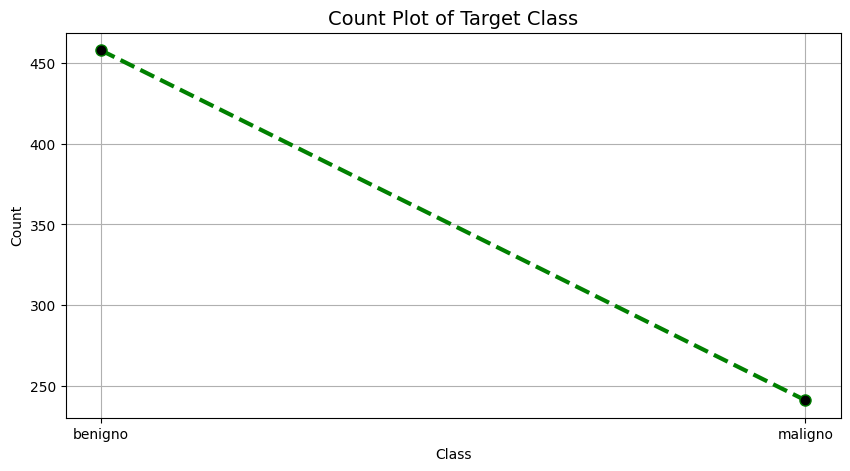

In [82]:
plt.figure(figsize=(10,5))
plt.plot(df["Class"].value_counts(), color="green", lw=3, ls='--', marker="o", markersize=8, markerfacecolor="black")
plt.title("Count Plot of Target Class", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True)

Text(0.5, 1.0, 'Count Plot of Target Class')

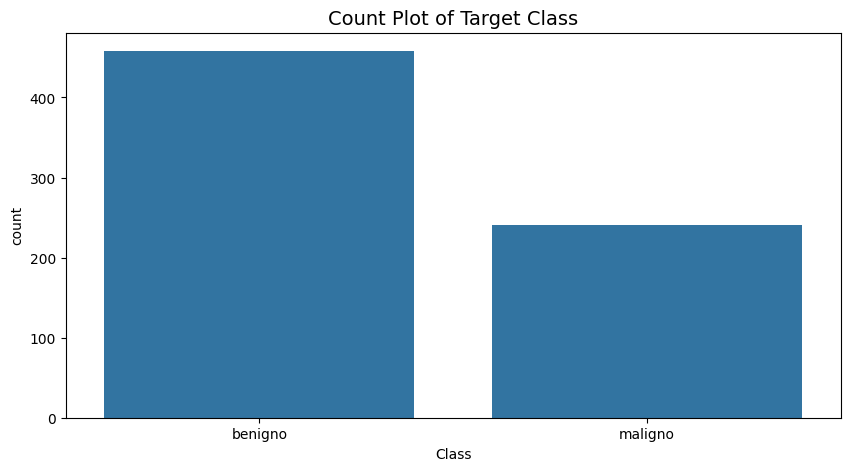

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(x="Class", data=df)
plt.title("Count Plot of Target Class", fontsize=14)


6 - Renombra los registro de la columna objetivo "Class", remplazando valores benigno por 0 y maligno por 1

In [84]:
df["Class"] = df["Class"].replace({"benigno": 0, "maligno": 1})
df.tail()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1
698,897471,4,8,8,5,4,5,10,4,1,1


- - -
7 - ¿Hay alguna columna que crees que no va a aportar información relevante? Si es así, elimínala.

In [85]:
df.info() # Vemos que no hay valores nulos en los datos y que la única variable no numérica es "Bare_Nuclei" que es "object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [86]:
df['Bare_Nuclei'].unique() # Vemos que hay un valor "?"

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [87]:
df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [88]:
### Comentamos este código para que no entre en conflicto con lo que se pide a partir del punto 11

## Reemplazamos el valor "?" Por la mediana que es 1
#df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
#df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median(), inplace=True)
#df['Bare_Nuclei'].value_counts()

In [89]:
# El Sample_code_number no va a aportar información relevante, así que lo quitamos
df = df.drop("Sample_code_number", axis=1)

- - -

8 - Emplea un bucle for para realizar un print de los nombres de las columnas del dataset

In [90]:
for column in df.columns:
    print(column)

Clump_Thickness
Uniformity_of_Cell_Size
Uniformity_of_Cell_Shape
Marginal_Adhesion
Single_Epithelial_Cell_Size
Bare_Nuclei
Bland_Chromatin
Normal_Nucleoli
Mitoses
Class


- - -
9 - Muestra los valores únicos de la columna "Clump_Thickness"

In [91]:
df["Clump_Thickness"].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9])

- - -
10 - Haciendo uso de un bucle for, realiza un print de los nombres de todas las columnas y sus valores únicos

In [92]:
for column in df.columns:
    print(column, df[column].unique())

Clump_Thickness [ 5  3  6  4  8  1  2  7 10  9]
Uniformity_of_Cell_Size [ 1  4  8 10  2  3  7  5  6  9]
Uniformity_of_Cell_Shape [ 1  4  8 10  2  3  5  6  7  9]
Marginal_Adhesion [ 1  5  3  8 10  4  6  2  9  7]
Single_Epithelial_Cell_Size [ 2  7  3  1  6  4  5  8 10  9]
Bare_Nuclei ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Bland_Chromatin [ 3  9  1  2  4  5  7  8  6 10]
Normal_Nucleoli [ 1  2  7  4  5  3 10  6  9  8]
Mitoses [ 1  5  4  2  3  7 10  8  6]
Class [0 1]


- - -
11 - Muestra los registros del dataset donde se cumpla la condición que los valores de la columna "Bare_Nuclei" sean igual a "?"

In [96]:
df[df["Bare_Nuclei"] == "?"]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,1
40,6,6,6,9,6,?,7,8,1,0
139,1,1,1,1,1,?,2,1,1,0
145,1,1,3,1,2,?,2,1,1,0
158,1,1,2,1,3,?,1,1,1,0
164,5,1,1,1,2,?,3,1,1,0
235,3,1,4,1,2,?,3,1,1,0
249,3,1,1,1,2,?,3,1,1,0
275,3,1,3,1,2,?,2,1,1,0
292,8,8,8,1,2,?,6,10,1,1


- - -
12 - Remplaza los valores "?" de la columna "Bare_Nuclei" por NaN de Numpy

In [105]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce') # Al pasar a numérico los valores "?" se vuelven NaN

df.iloc[23]

Clump_Thickness                8.0
Uniformity_of_Cell_Size        4.0
Uniformity_of_Cell_Shape       5.0
Marginal_Adhesion              1.0
Single_Epithelial_Cell_Size    2.0
Bare_Nuclei                    NaN
Bland_Chromatin                7.0
Normal_Nucleoli                3.0
Mitoses                        1.0
Class                          1.0
Name: 23, dtype: float64

- - -
13 - Elimina las filas del dataset que contengan NaN

In [112]:
df = df.dropna()

- - -
14 - Separa el dataset en "X" e "y"

In [113]:
X = df[["Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"]]
y = df[["Class"]]

- - -
15 - Realiza la separación de "X" e "y" usando train_test_split

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=2)

- - -
16 - Carga los datos en el algoritmo de regresión logística efectuando un fit

In [115]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

- - -
17 - Con el modelo, realiza la predicción de los valores de X_test

In [116]:
y_test_pred = LR.predict(X_test)

- - -
18 - Obten la métrica de Accuracy para la predicción de test

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz_de_confusión = confusion_matrix(y_test, y_test_pred)

- - -
| *Matriz Confusión*        | Predicción Negativa    | Predicción Positiva     |
| -------------             | :-------------:          | :-------------:           |
| **Observación Negativa** | Verdaderos Negativo (VN)  | Falsos Positivo (FP)      |
| **Observación Positiva** | Falsos Negativo (FN)      | Verdaderos Positivos (VP) |

In [125]:
VN = matriz_de_confusión[0][0]
FP = matriz_de_confusión[0][1]
FN = matriz_de_confusión[1][0]
VP = matriz_de_confusión[1][1]

print("The Accuracy (o exactitud) = ", (VP + VN) / (VP + VN + FP + FN) )
print("La especificidad = ",  VN/(VN+FP) )
print("La sensibilidad = ",  VP/(VP+FN) )

The Accuracy (o exactitud) =  0.9951219512195122
La especificidad =  1.0
La sensibilidad =  0.9861111111111112


- - -
19 - Obten la métrica de AUC para la predicción de test

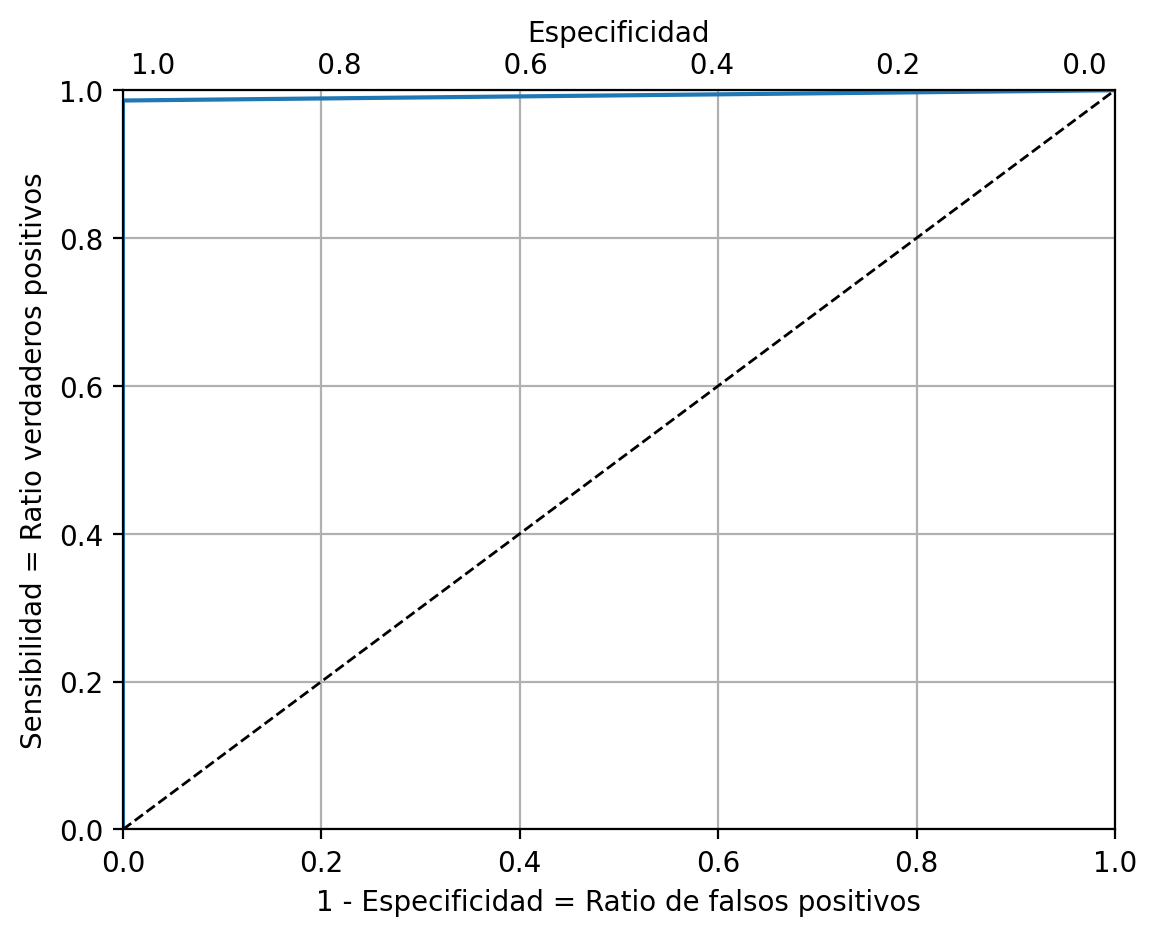

In [129]:
from sklearn.metrics import roc_curve
RFP, RVP, umbrales = roc_curve(y_test, y_test_pred)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.plot(RFP, RVP)
plt.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Especificidad\n1.0                0.8                0.6                0.4                0.2                0.0", fontsize=10)
plt.xlabel("1 - Especificidad = Ratio de falsos positivos")
plt.ylabel("Sensibilidad = Ratio verdaderos positivos")
plt.grid(True)

In [131]:
# La métrica de AUC será el área debajo de esa curva azul.
# Cuando más se aproxime nuestro valor de AUC a 1, mejor sera el rendimiento de nuestro modelo.
# Visualmente ya vemos que se aproxima a uno

from sklearn.metrics import roc_auc_score
print("AUC metrics = ", roc_auc_score(y_test, y_test_pred) )

AUC metrics =  0.9930555555555556


- - -
20 - Obten la matriz de confusión de test

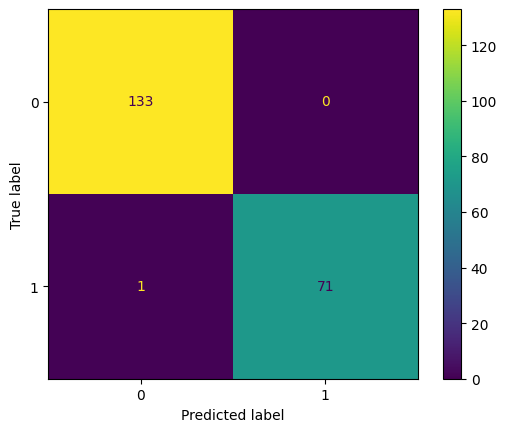

In [126]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred);

- - -